In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [113]:
pd.set_option('display.max_rows', None)

In [114]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression='gzip')

C:\Users\doron\AppData\Local\Temp\ipykernel_21908\1964838829.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression='gzip')


In [115]:
# Display basic information about the accepted loans data
print(df.info())
print(df.describe())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
None
       member_id     loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count        0.0  2.260668e+06  2.260668e+06     2.260668e+06  2.260668e+06   
mean         NaN  1.504693e+04  1.504166e+04     1.502344e+04  1.309283e+01   
std          NaN  9.190245e+03  9.188413e+03     9.192332e+03  4.832138e+00   
min          NaN  5.000000e+02  5.000000e+02     0.000000e+00  5.310000e+00   
25%          NaN  8.000000e+03  8.000000e+03     8.000000e+03  9.490000e+00   
50%          NaN  1.290000e+04  1.287500e+04     1.280000e+04  1.262000e+01   
75%          NaN  2.000000e+04  2.000000e+04     2.000000e+04  1.599000e+01   
max          NaN  4.000000e+04  4.000000e+04     4.000000e+04  3.099000e+01   

        installment    annual_inc           dti   delinq_2yrs  fico_range_low  \
count  2.260668e+06  2.

In [116]:
df.isnull().sum()

id                                                  0
member_id                                     2260701
loan_amnt                                          33
funded_amnt                                        33
funded_amnt_inv                                    33
term                                               33
int_rate                                           33
installment                                        33
grade                                              33
sub_grade                                          33
emp_title                                      167002
emp_length                                     146940
home_ownership                                     33
annual_inc                                         37
verification_status                                33
issue_d                                            33
loan_status                                        33
pymnt_plan                                         33
url                         

In [117]:
# List of columns to keep
columns_to_keep = [
    'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'issue_d', 
    'loan_status', 'purpose', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 
    'fico_range_high', 'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 
    'last_pymnt_d', 'last_pymnt_amnt', 'application_type', 'pub_rec'
]

# Drop columns not in the list
df = df[columns_to_keep]

# Display the first few rows of the modified DataFrame
print(df.head())

   loan_amnt  funded_amnt        term  int_rate grade sub_grade   issue_d  \
0     3600.0       3600.0   36 months     13.99     C        C4  Dec-2015   
1    24700.0      24700.0   36 months     11.99     C        C1  Dec-2015   
2    20000.0      20000.0   60 months     10.78     B        B4  Dec-2015   
3    35000.0      35000.0   60 months     14.85     C        C5  Dec-2015   
4    10400.0      10400.0   60 months     22.45     F        F1  Dec-2015   

  loan_status             purpose  annual_inc  ...  fico_range_low  \
0  Fully Paid  debt_consolidation     55000.0  ...           675.0   
1  Fully Paid      small_business     65000.0  ...           715.0   
2  Fully Paid    home_improvement     63000.0  ...           695.0   
3     Current  debt_consolidation    110000.0  ...           785.0   
4  Fully Paid      major_purchase    104433.0  ...           695.0   

   fico_range_high  inq_last_6mths  revol_bal  revol_util  total_acc  \
0            679.0             1.0     2765.

In [118]:
print(df.info())
print(df.describe())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   loan_amnt         float64
 1   funded_amnt       float64
 2   term              object 
 3   int_rate          float64
 4   grade             object 
 5   sub_grade         object 
 6   issue_d           object 
 7   loan_status       object 
 8   purpose           object 
 9   annual_inc        float64
 10  dti               float64
 11  delinq_2yrs       float64
 12  fico_range_low    float64
 13  fico_range_high   float64
 14  inq_last_6mths    float64
 15  revol_bal         float64
 16  revol_util        float64
 17  total_acc         float64
 18  last_pymnt_d      object 
 19  last_pymnt_amnt   float64
 20  application_type  object 
 21  pub_rec           float64
dtypes: float64(14), object(8)
memory usage: 379.5+ MB
None
          loan_amnt   funded_amnt      int_rate    annual_inc           dti  \
coun

In [119]:
df.isnull().sum()

loan_amnt             33
funded_amnt           33
term                  33
int_rate              33
grade                 33
sub_grade             33
issue_d               33
loan_status           33
purpose               33
annual_inc            37
dti                 1744
delinq_2yrs           62
fico_range_low        33
fico_range_high       33
inq_last_6mths        63
revol_bal             33
revol_util          1835
total_acc             62
last_pymnt_d        2460
last_pymnt_amnt       33
application_type      33
pub_rec               62
dtype: int64

In [120]:
df.dropna(inplace=True)

In [121]:
df.isnull().sum()

loan_amnt           0
funded_amnt         0
term                0
int_rate            0
grade               0
sub_grade           0
issue_d             0
loan_status         0
purpose             0
annual_inc          0
dti                 0
delinq_2yrs         0
fico_range_low      0
fico_range_high     0
inq_last_6mths      0
revol_bal           0
revol_util          0
total_acc           0
last_pymnt_d        0
last_pymnt_amnt     0
application_type    0
pub_rec             0
dtype: int64

In [122]:
df.shape

(2254745, 22)

In [123]:
# Ensure dates are in datetime format for accepted loans
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

In [124]:
# Filter data for 2007-2015
df_2007_2015 = df[(df['issue_d'] >= '2007-01-01') & (df['issue_d'] <= '2015-12-31')]

# Filter data for 2016 onwards
df_2016_2018 = df[df['issue_d'] >= '2016-01-01']

# Save the DataFrames to CSV files
df_2007_2015.to_csv('lending_club_2007_2015.csv', index=False)
df_2016_2018.to_csv('lending_club_2016_2018.csv', index=False)

In [125]:
def perform_eda(df):
    
    # Basic info
    print("Basic Information:")
    print(df.info())
    print("\n")
    
    # Summary statistics
    print("Summary Statistics:")
    print(df.describe())
    print("\n")
    
    # Missing values
    print("Missing Values:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])
    print("\n")
    
    # Distribution of numerical features
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    print("Distribution of Numerical Features:")
    df[numerical_cols].hist(figsize=(15, 10), bins=20)
    plt.tight_layout()
    plt.show()
    
    # Distribution of categorical features
    categorical_cols = df.select_dtypes(include=['object']).columns
    print("Distribution of Categorical Features:")
    for col in categorical_cols:
        plt.figure(figsize=(10, 5))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    
    # Correlation heatmap for numerical features only
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    correlation_matrix = df[numerical_cols].corr()
    
    print("Correlation Heatmap:")
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title('Correlation Heatmap')
    plt.show()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 886272 entries, 0 to 1939378
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   loan_amnt         886272 non-null  float64       
 1   funded_amnt       886272 non-null  float64       
 2   term              886272 non-null  object        
 3   int_rate          886272 non-null  float64       
 4   grade             886272 non-null  object        
 5   sub_grade         886272 non-null  object        
 6   issue_d           886272 non-null  datetime64[ns]
 7   loan_status       886272 non-null  object        
 8   purpose           886272 non-null  object        
 9   annual_inc        886272 non-null  float64       
 10  dti               886272 non-null  float64       
 11  delinq_2yrs       886272 non-null  float64       
 12  fico_range_low    886272 non-null  float64       
 13  fico_range_high   886272 non-null  float64  

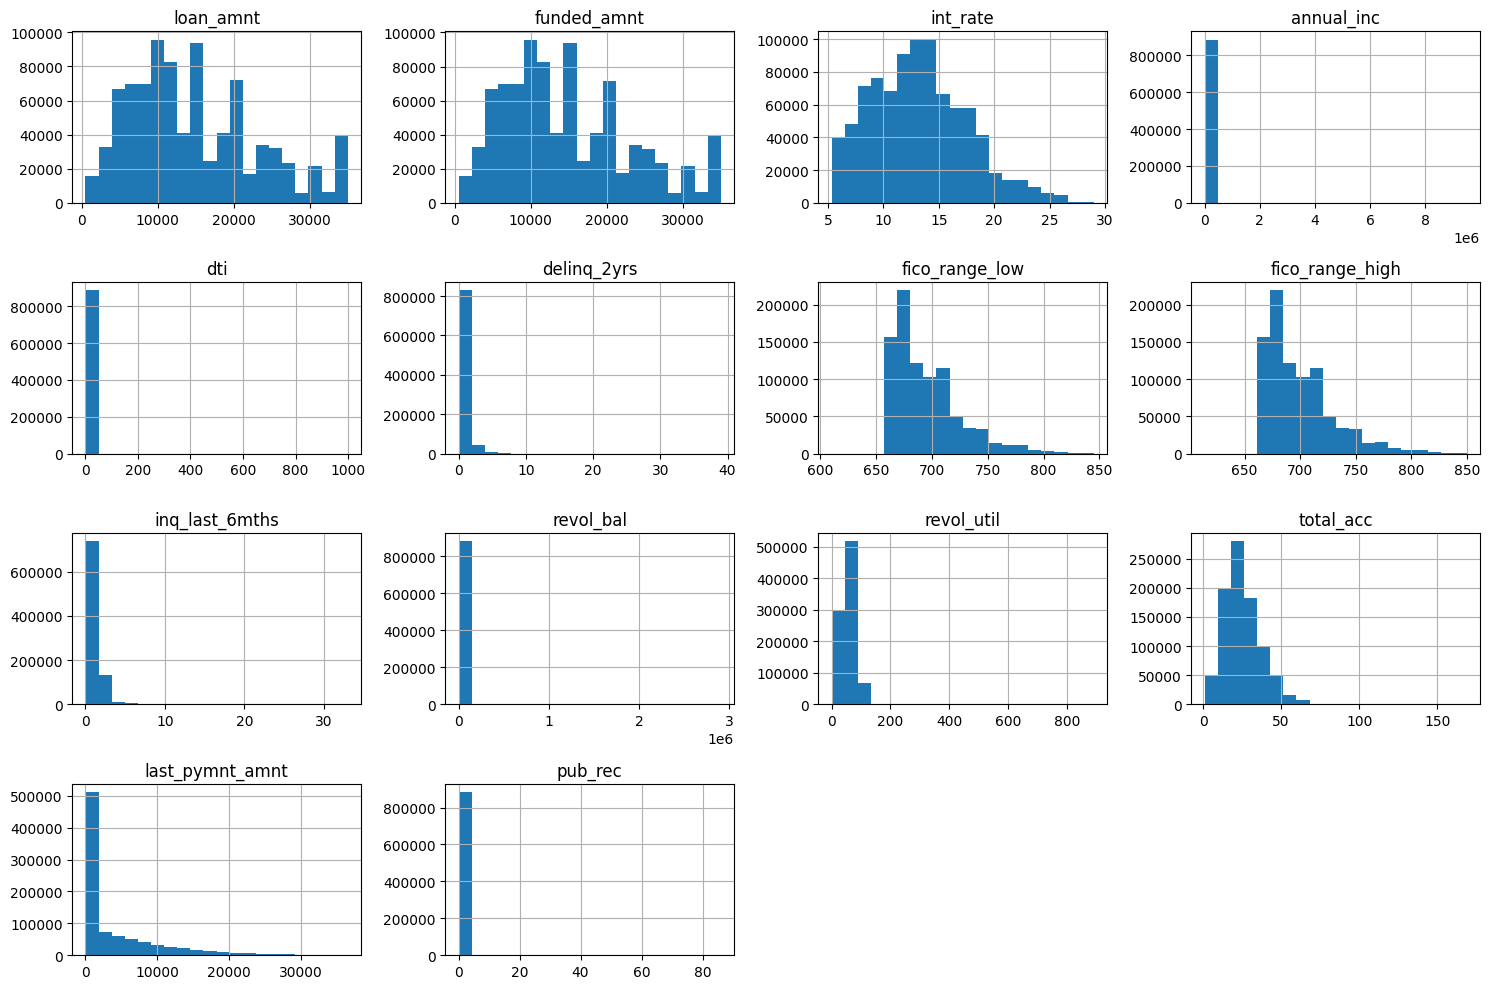

Distribution of Categorical Features:


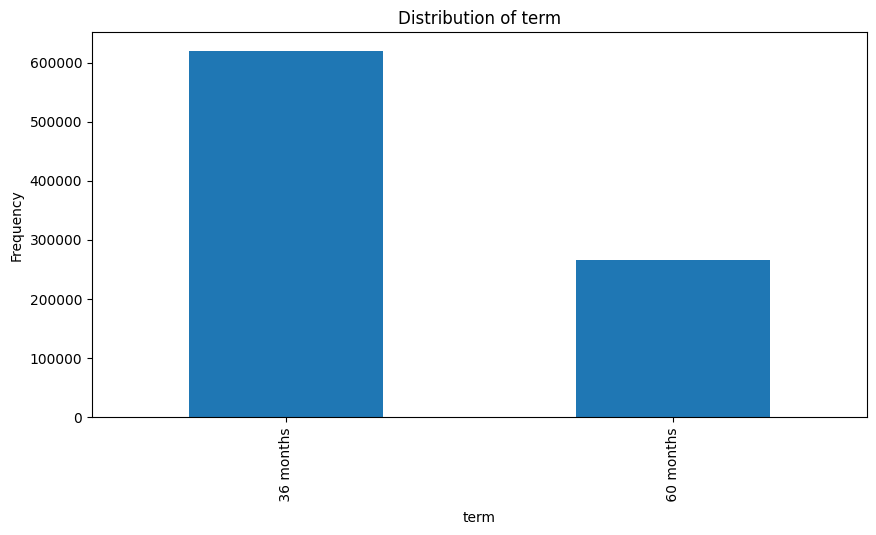

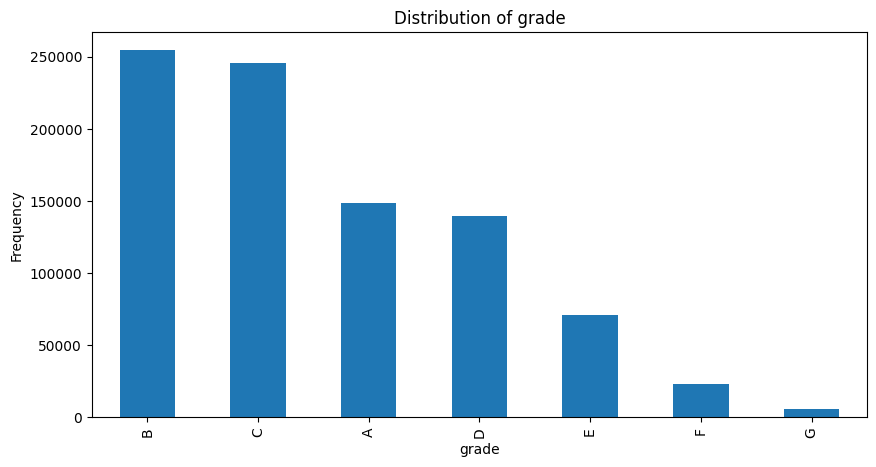

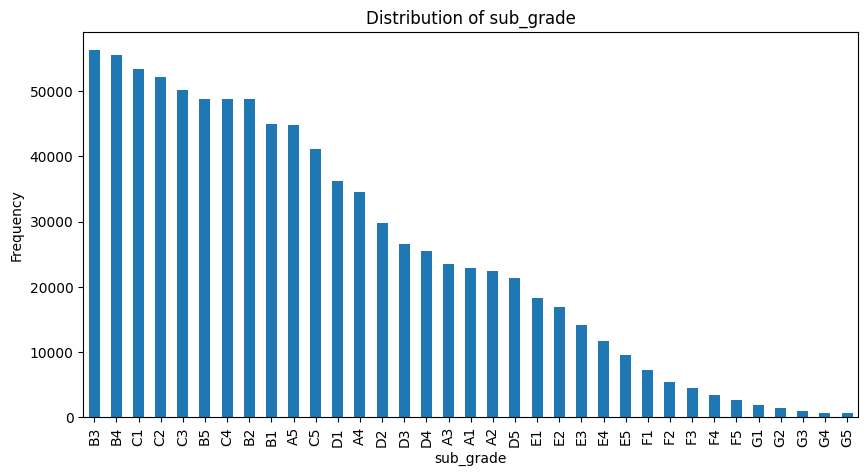

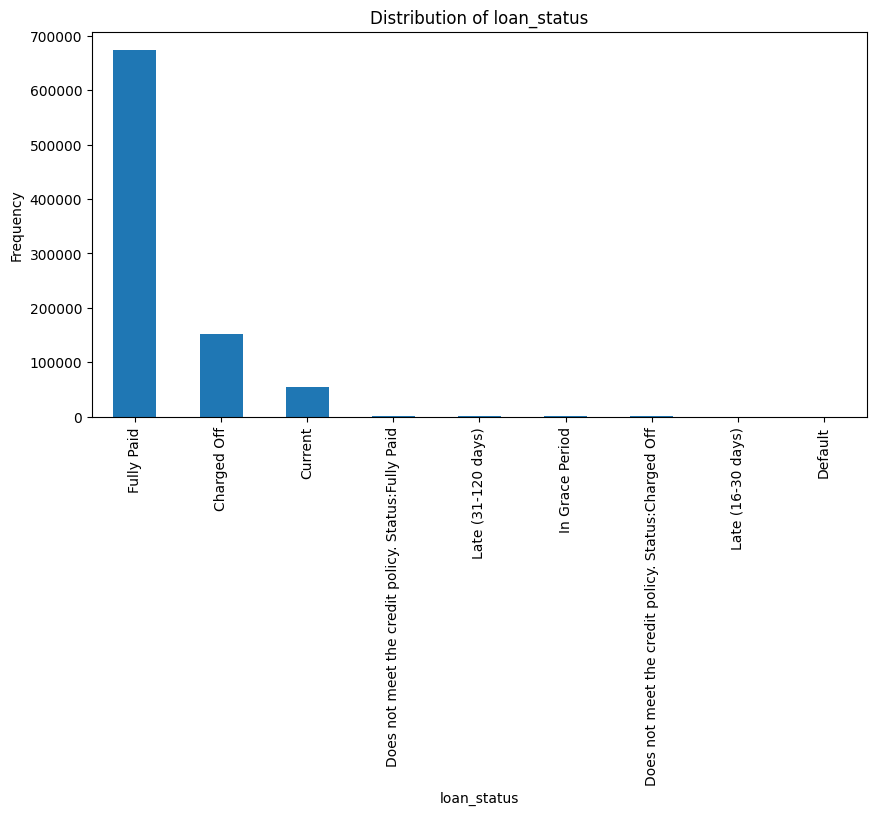

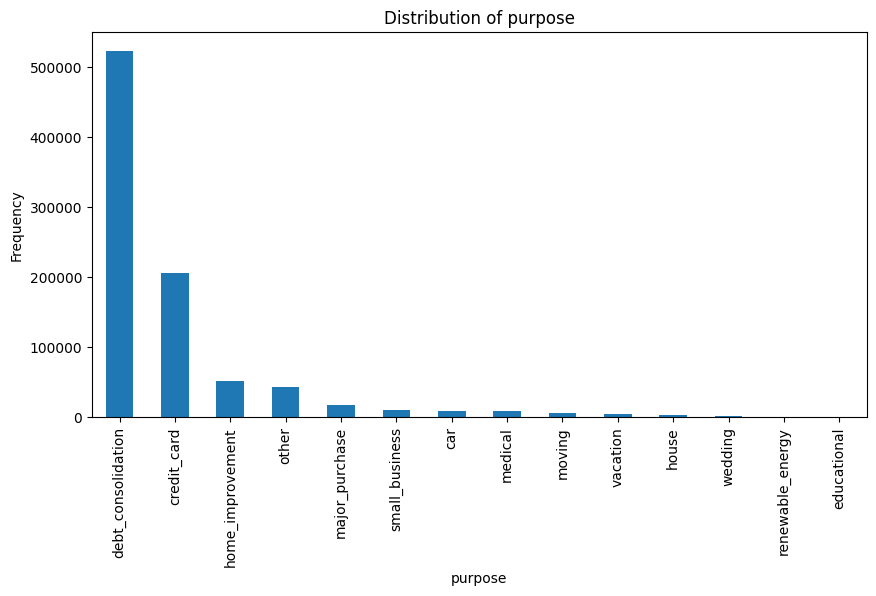

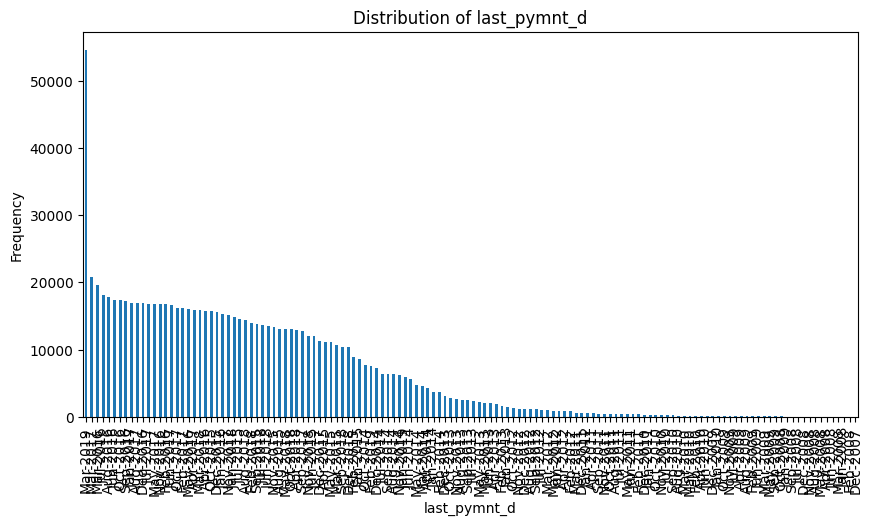

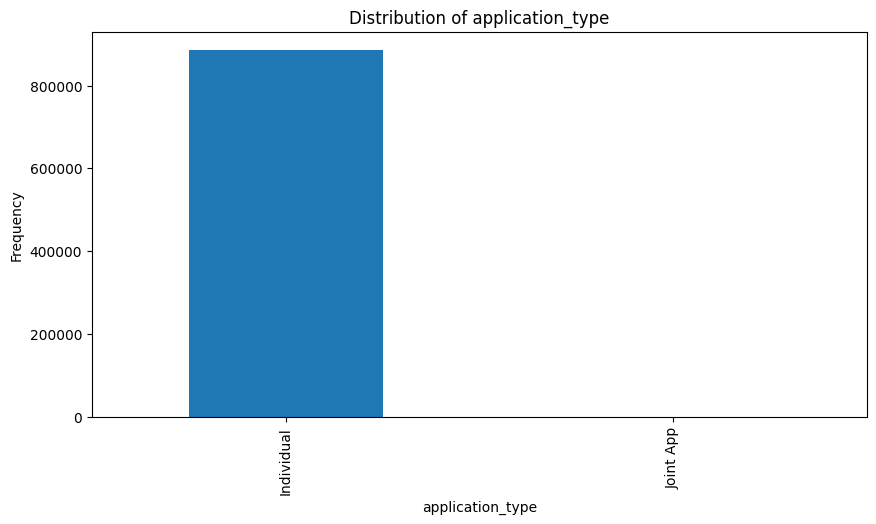

Correlation Heatmap:


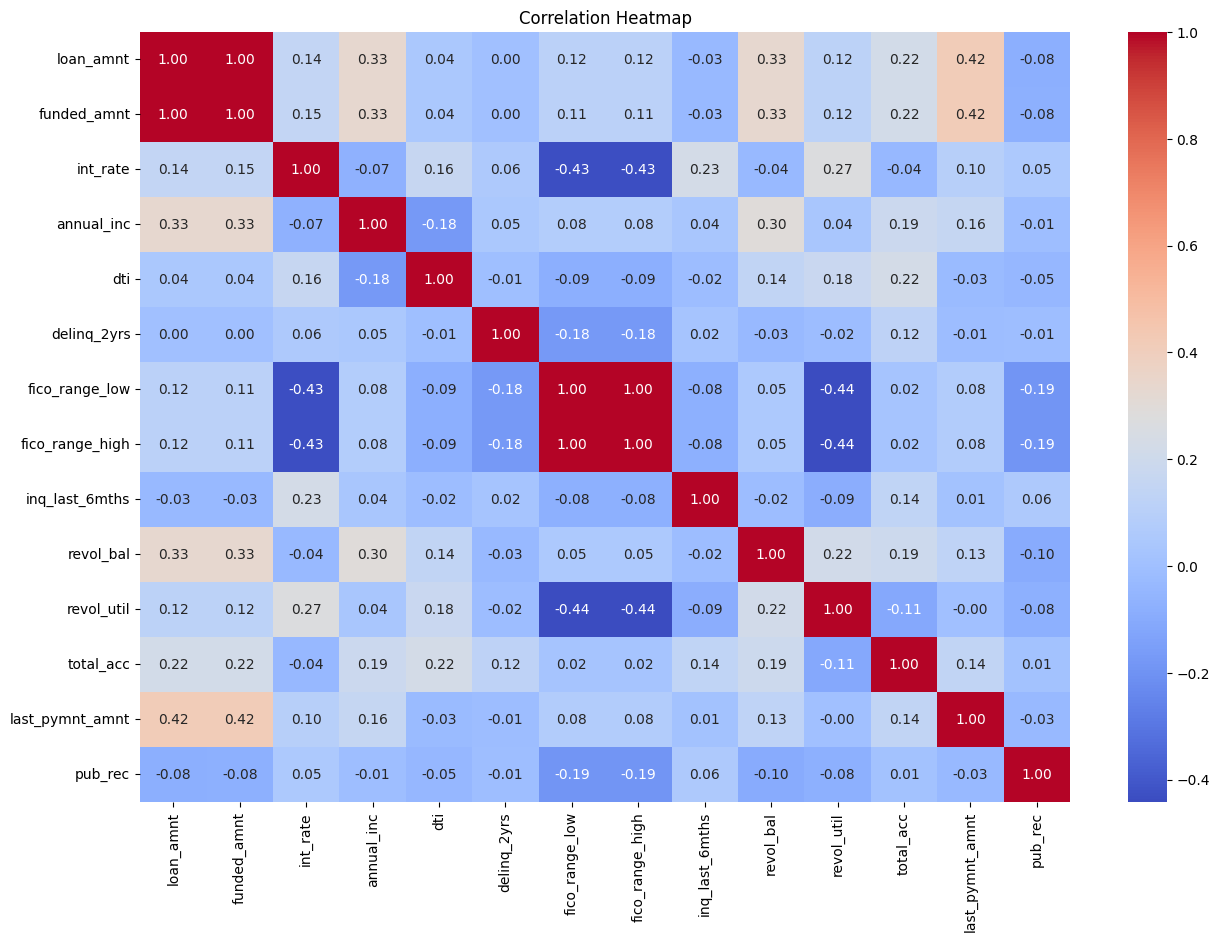

In [126]:
perform_eda(df_2007_2015)

In [127]:
def calculate_metrics(df):
    # Ensure `issue_d` and `last_pymnt_d` are datetime types
    df['issue_d'] = pd.to_datetime(df['issue_d'])
    df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
    
    # Extract the quarter from `issue_d`
    df['quarter'] = df['issue_d'].dt.to_period('Q')
    
    # Extract term in months from `term`
    df['term_months'] = df['term'].str.replace(' months', '').astype(int)
    
    # Define default statuses
    default_statuses = ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)']
    fully_paid = ["Fully Paid", "Does not meet the credit policy. Status:Fully Paid"]
    
    # Define segmentation columns
    segmentation_columns = ['grade', 'term_months', 'quarter']
    
    # Group by segmentation columns
    grouped = df.groupby(segmentation_columns)
    
    # Calculate metrics
    metrics = grouped.agg(
        loan_amount_sum=('loan_amnt', 'sum'),
        funded_amount_sum=('funded_amnt', 'sum'),
        weighted_interest_rate=('int_rate', lambda x: np.average(x, weights=df.loc[x.index, 'loan_amnt'])),
        default_rate=('loan_status', lambda x: (x.isin(default_statuses).sum() / len(x))),
        prepayment_rate=('loan_status', lambda x: (x.isin(fully_paid).sum() / len(x))),
        annual_inc_sum=('annual_inc', 'sum'),
        num_default_events=('loan_status', lambda x: x.isin(default_statuses).sum()),
        total_loan_amnt=('loan_amnt', 'sum'),
        total_prepayment_amount=('last_pymnt_amnt', 'sum')
    ).reset_index()
    
    # Calculate LGD and CNL rates
    metrics['lgd_rate'] = 100 * (metrics['loan_amount_sum'] - metrics['loan_amount_sum'] * (1 + metrics['weighted_interest_rate'] / 100) + metrics['annual_inc_sum']) / metrics['loan_amount_sum']
    metrics['cumulative_net_loss_rate'] = 100 * (metrics['loan_amount_sum'] - metrics['loan_amount_sum'] * (1 + metrics['weighted_interest_rate'] / 100)) / metrics['loan_amount_sum']
    
    # Calculate monthly prepayment rate
    metrics['monthly_prepayment_rate'] = 100 * (metrics['total_prepayment_amount'] / metrics['loan_amount_sum'])
    
    # Calculate cash collection curve
    metrics['cash_collection_curve'] = 100 * (metrics['total_prepayment_amount'] / metrics['loan_amount_sum'])
    
    # Calculate annual return on the loan portfolio
    metrics['annual_return'] = 100 * (metrics['loan_amount_sum'] * (1 + metrics['weighted_interest_rate'] / 100) - metrics['loan_amount_sum']) / metrics['loan_amount_sum']
    
    return metrics


In [128]:
metrics_df = calculate_metrics(df_2007_2015)
print(metrics_df)

C:\Users\doron\AppData\Local\Temp\ipykernel_21908\1095621799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_d'] = pd.to_datetime(df['issue_d'])
C:\Users\doron\AppData\Local\Temp\ipykernel_21908\1095621799.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
C:\Users\doron\AppData\Local\Temp\ipykernel_21908\1095621799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

    grade  term_months quarter  loan_amount_sum  funded_amount_sum  \
0       A           36  2007Q3         161050.0           161050.0   
1       A           36  2007Q4         181500.0           181500.0   
2       A           36  2008Q1         694675.0           694675.0   
3       A           36  2008Q2         364150.0           320800.0   
4       A           36  2008Q3         227200.0           199625.0   
5       A           36  2008Q4         689050.0           679300.0   
6       A           36  2009Q1        1421350.0          1421350.0   
7       A           36  2009Q2        1888200.0          1888200.0   
8       A           36  2009Q3        2397325.0          2397200.0   
9       A           36  2009Q4        2993800.0          2993800.0   
10      A           36  2010Q1        3378850.0          3378850.0   
11      A           36  2010Q2        4236175.0          4137650.0   
12      A           36  2010Q3        5352725.0          5352725.0   
13      A           

In [129]:
# Ensure the necessary columns are properly formatted
metrics_df['quarter'] = metrics_df['quarter'].astype(str)
metrics_df['default_rate'] = metrics_df['default_rate'].astype(float)
metrics_df['cumulative_net_loss_rate'] = metrics_df['cumulative_net_loss_rate'].astype(float)
metrics_df['prepayment_rate'] = metrics_df['prepayment_rate'].astype(float)
metrics_df['monthly_prepayment_rate'] = metrics_df['monthly_prepayment_rate'].astype(float)
metrics_df['cash_collection_curve'] = metrics_df['cash_collection_curve'].astype(float)
metrics_df['annual_return'] = metrics_df['annual_return'].astype(float)

In [130]:
metrics_df.dtypes

grade                        object
term_months                   int32
quarter                      object
loan_amount_sum             float64
funded_amount_sum           float64
weighted_interest_rate      float64
default_rate                float64
prepayment_rate             float64
annual_inc_sum              float64
num_default_events            int64
total_loan_amnt             float64
total_prepayment_amount     float64
lgd_rate                    float64
cumulative_net_loss_rate    float64
monthly_prepayment_rate     float64
cash_collection_curve       float64
annual_return               float64
dtype: object

In [131]:
def plot_default_rate(metrics):
    # Sort the DataFrame by 'quarter'
    metrics_sorted = metrics.sort_values(by='quarter')
    
    # Filter for 36-month term
    metrics_36 = metrics_sorted[metrics_sorted['term_months'] == 36]
    # Filter for 60-month term
    metrics_60 = metrics_sorted[metrics_sorted['term_months'] == 60]
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=metrics_36, x='quarter', y='default_rate', hue='grade', markers=True, dashes=False)
    plt.title('Default Rate Over Time by Loan Grade (36-month Term)')
    plt.xlabel('Quarter')
    plt.ylabel('Default Rate (%)')
    plt.xticks(rotation=45)  # Rotate the x-axis labels to be diagonal
    plt.show()
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=metrics_60, x='quarter', y='default_rate', hue='grade', markers=True, dashes=False)
    plt.title('Default Rate Over Time by Loan Grade (60-month Term)')
    plt.xlabel('Quarter')
    plt.ylabel('Default Rate (%)')
    plt.xticks(rotation=45)  # Rotate the x-axis labels to be diagonal
    plt.show()

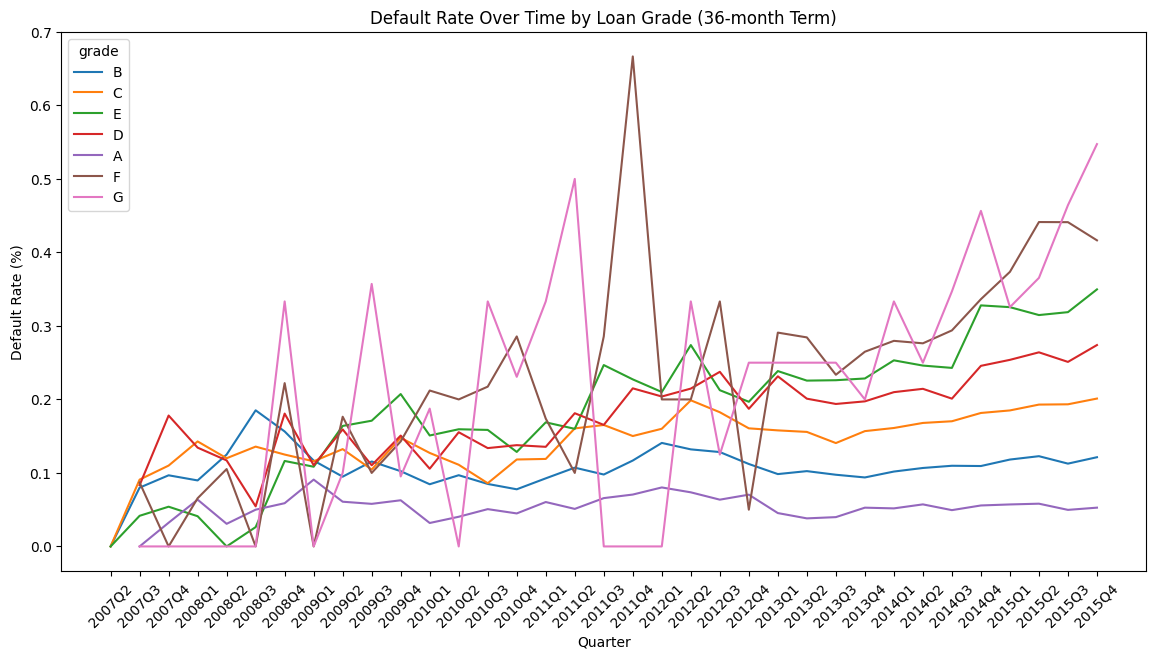

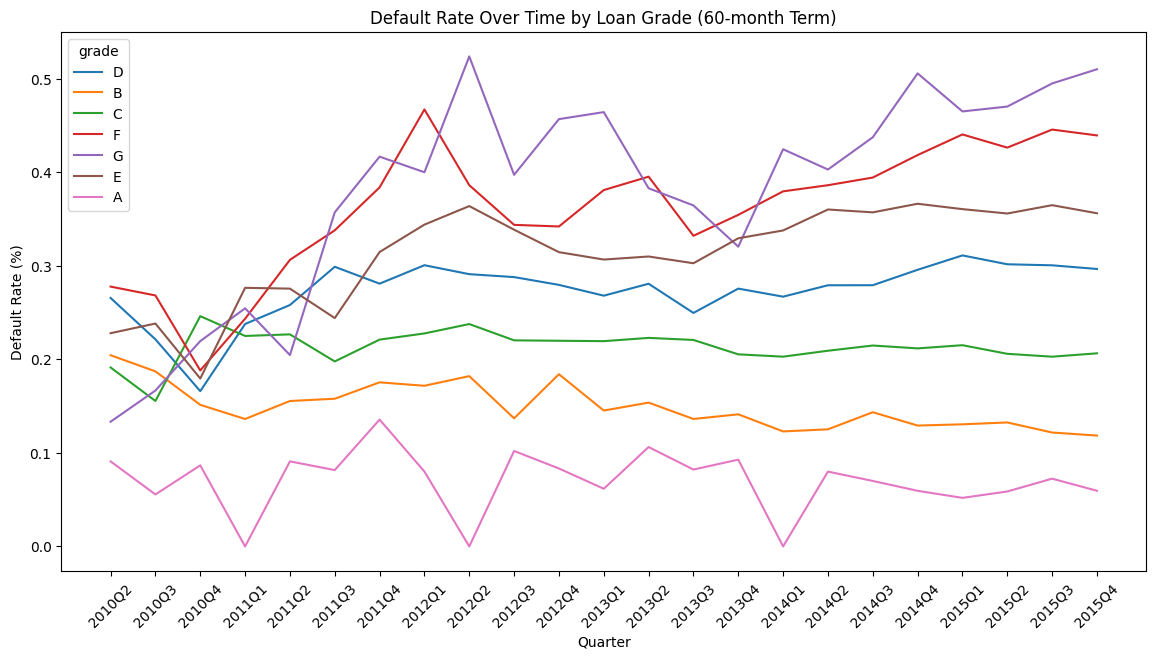

In [132]:
plot_default_rate(metrics_df)

In [133]:
def plot_cumulative_net_loss_rate(metrics):
    # Sort the DataFrame by 'quarter'
    metrics_sorted = metrics.sort_values(by='quarter')
    
    # Filter for 36-month term
    metrics_36 = metrics_sorted[metrics_sorted['term_months'] == 36]
    # Filter for 60-month term
    metrics_60 = metrics_sorted[metrics_sorted['term_months'] == 60]
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=metrics_36, x='quarter', y='cumulative_net_loss_rate', hue='grade', markers=True, dashes=False)
    plt.title('Cumulative Net Loss Rate Over Time by Loan Grade (36-month Term)')
    plt.xlabel('Quarter')
    plt.ylabel('Cumulative Net Loss Rate (%)')
    plt.xticks(rotation=45)  # Rotate the x-axis labels to be diagonal
    plt.show()
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=metrics_60, x='quarter', y='cumulative_net_loss_rate', hue='grade', markers=True, dashes=False)
    plt.title('Cumulative Net Loss Rate Over Time by Loan Grade (60-month Term)')
    plt.xlabel('Quarter')
    plt.ylabel('Cumulative Net Loss Rate (%)')
    plt.xticks(rotation=45)  # Rotate the x-axis labels to be diagonal
    plt.show()

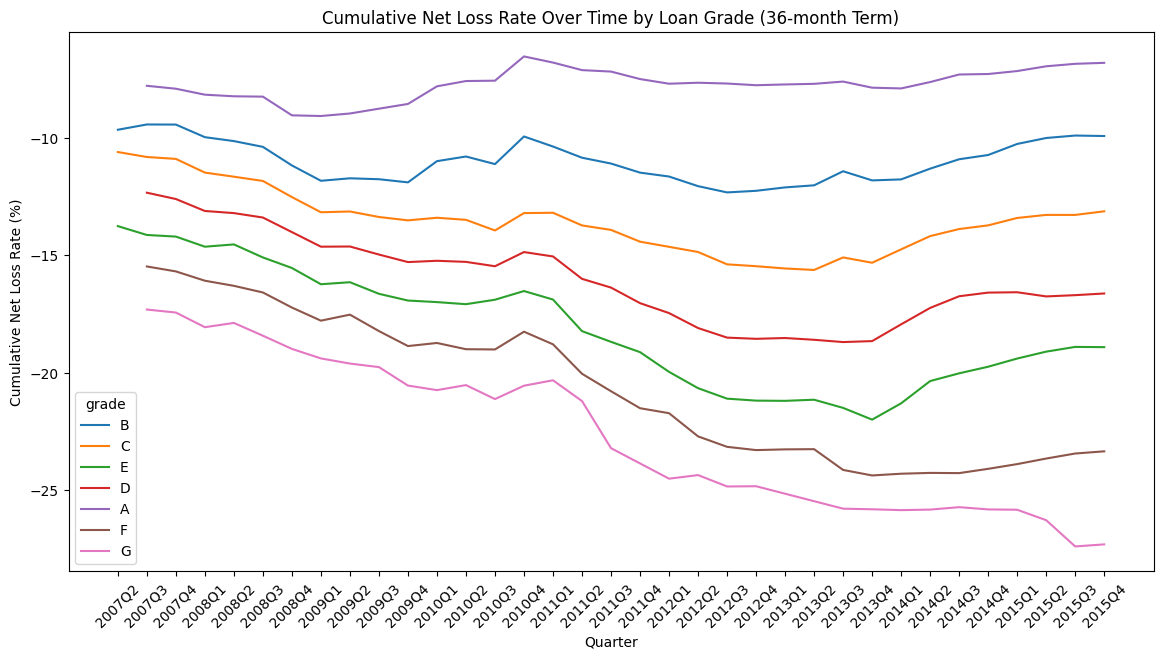

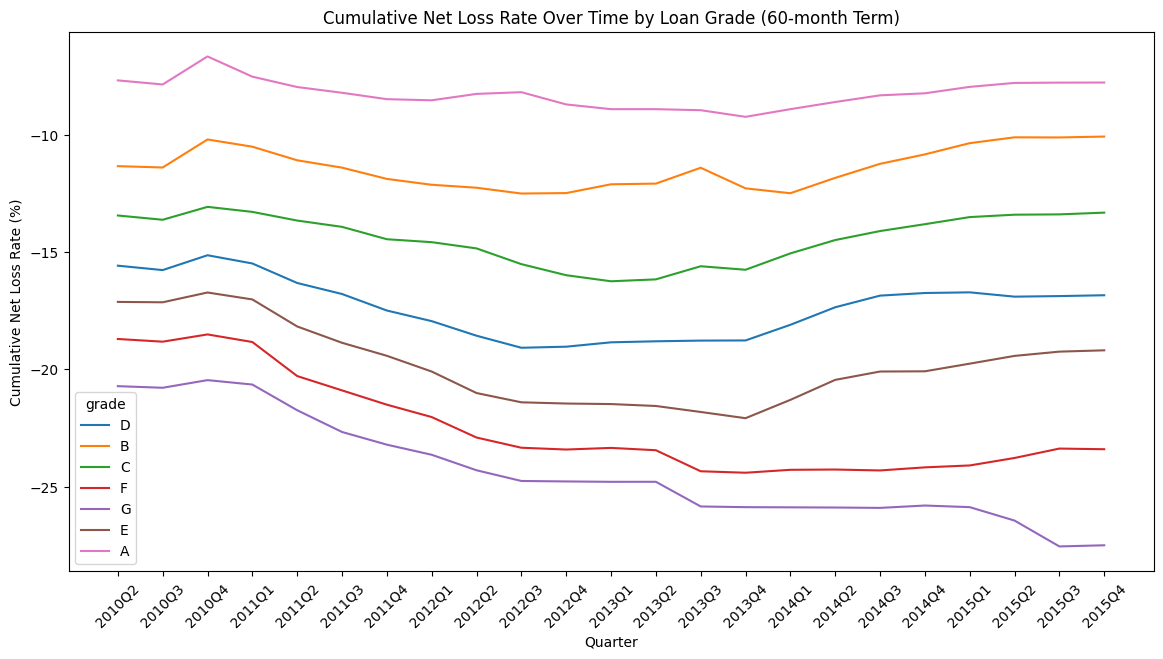

In [134]:
plot_cumulative_net_loss_rate(metrics_df)

In [135]:
def plot_prepayment_rate(metrics):
    # Sort the DataFrame by 'quarter'
    metrics_sorted = metrics.sort_values(by='quarter')
    
    # Filter for 36-month term
    metrics_36 = metrics_sorted[metrics_sorted['term_months'] == 36]
    # Filter for 60-month term
    metrics_60 = metrics_sorted[metrics_sorted['term_months'] == 60]
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=metrics_36, x='quarter', y='prepayment_rate', hue='grade', markers=True, dashes=False)
    plt.title('Prepayment Rate Over Time by Loan Grade (36-month Term)')
    plt.xlabel('Quarter')
    plt.ylabel('Prepayment Rate (%)')
    plt.xticks(rotation=45)  # Rotate the x-axis labels to be diagonal
    plt.show()
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=metrics_60, x='quarter', y='prepayment_rate', hue='grade', markers=True, dashes=False)
    plt.title('Prepayment Rate Over Time by Loan Grade (60-month Term)')
    plt.xlabel('Quarter')
    plt.ylabel('Prepayment Rate (%)')
    plt.xticks(rotation=45)  # Rotate the x-axis labels to be diagonal
    plt.show()

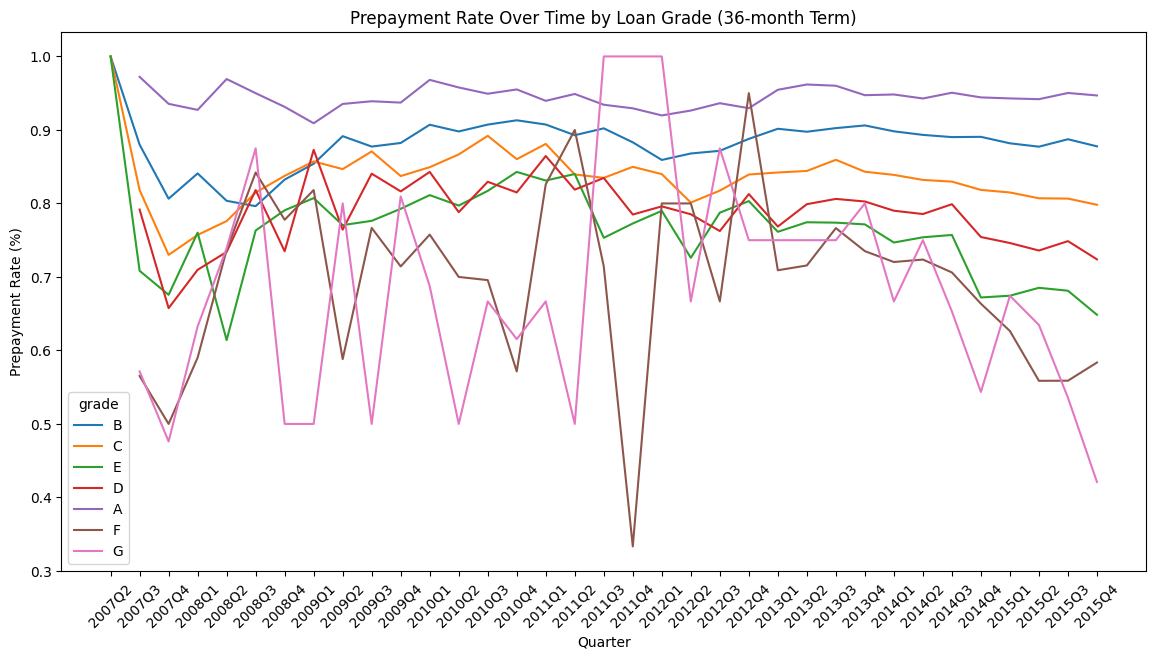

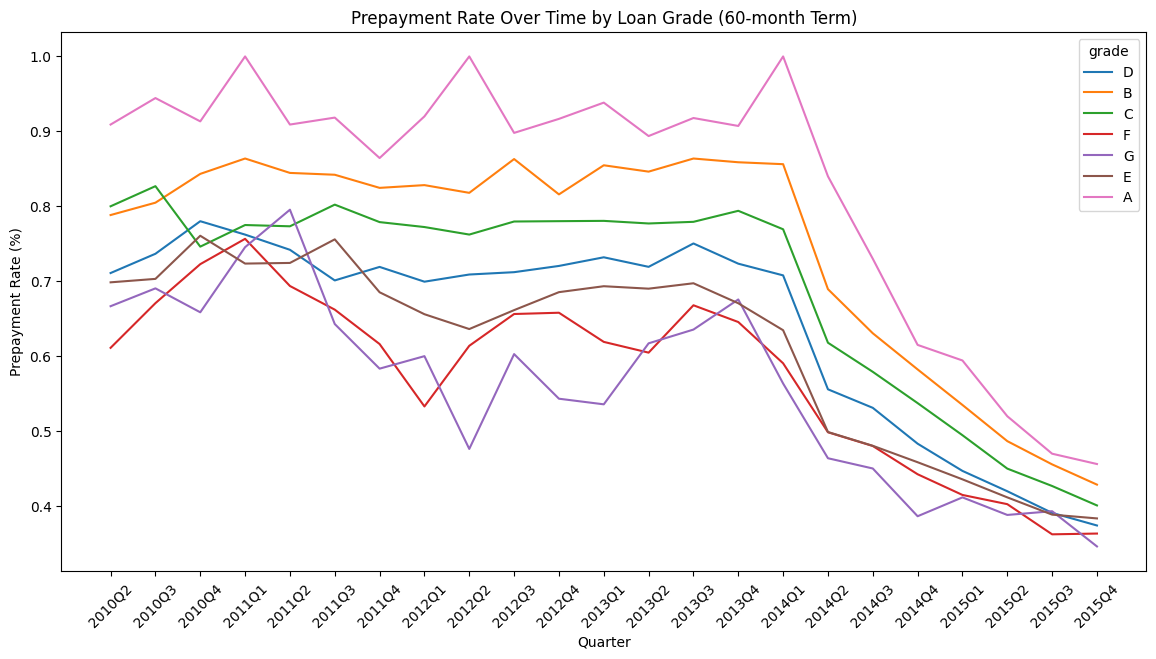

In [136]:
plot_prepayment_rate(metrics_df)


In [137]:
def plot_monthly_prepayment_rate(metrics):
    # Sort the DataFrame by 'quarter'
    metrics_sorted = metrics.sort_values(by='quarter')
    
    # Filter for 36-month term
    metrics_36 = metrics_sorted[metrics_sorted['term_months'] == 36]
    # Filter for 60-month term
    metrics_60 = metrics_sorted[metrics_sorted['term_months'] == 60]
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=metrics_36, x='quarter', y='monthly_prepayment_rate', hue='grade', markers=True, dashes=False)
    plt.title('Monthly Prepayment Rate Over Time by Loan Grade (36-month Term)')
    plt.xlabel('Quarter')
    plt.ylabel('Monthly Prepayment Rate (%)')
    plt.xticks(rotation=45)  # Rotate the x-axis labels to be diagonal
    plt.show()
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=metrics_60, x='quarter', y='monthly_prepayment_rate', hue='grade', markers=True, dashes=False)
    plt.title('Monthly Prepayment Rate Over Time by Loan Grade (60-month Term)')
    plt.xlabel('Quarter')
    plt.ylabel('Monthly Prepayment Rate (%)')
    plt.xticks(rotation=45)  # Rotate the x-axis labels to be diagonal
    plt.show()


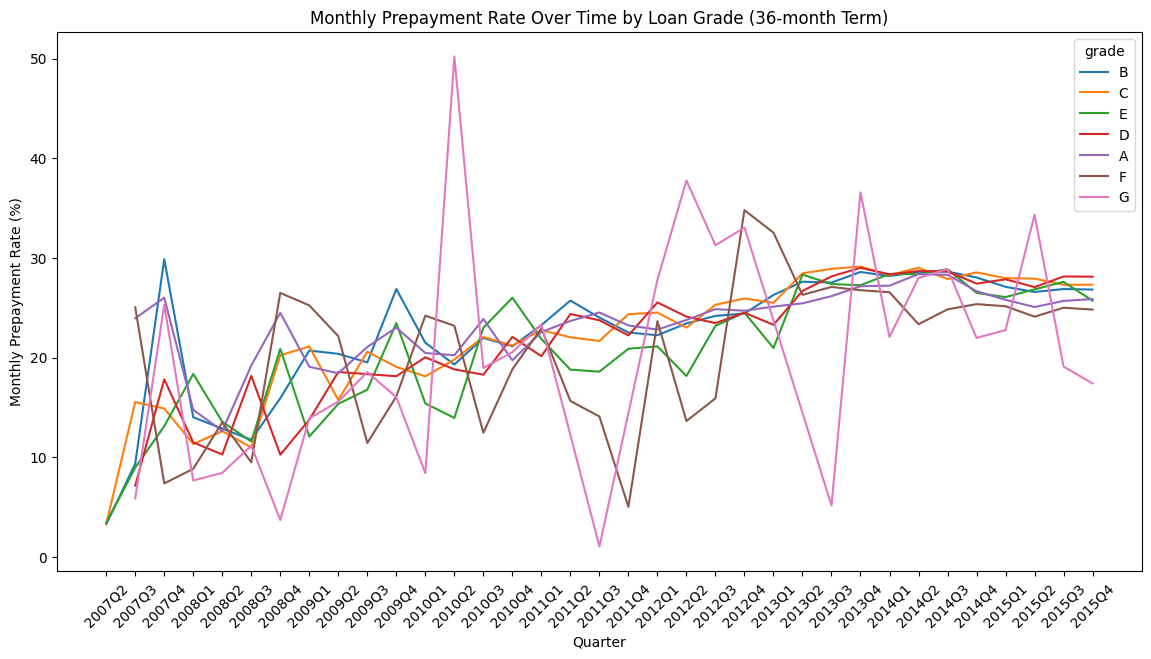

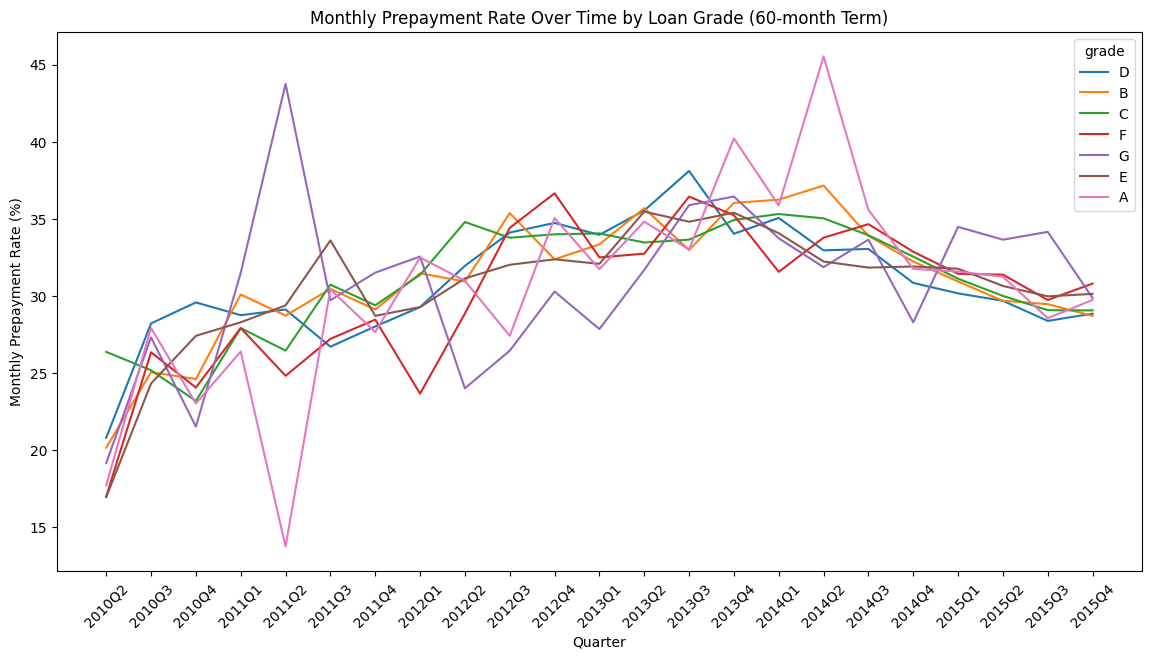

In [138]:
plot_monthly_prepayment_rate(metrics_df)

In [139]:
def plot_cash_collection_curve(metrics):
    # Sort the DataFrame by 'quarter'
    metrics_sorted = metrics.sort_values(by='quarter')
    
    # Filter for 36-month term
    metrics_36 = metrics_sorted[metrics_sorted['term_months'] == 36]
    # Filter for 60-month term
    metrics_60 = metrics_sorted[metrics_sorted['term_months'] == 60]
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=metrics_36, x='quarter', y='cash_collection_curve', hue='grade', markers=True, dashes=False)
    plt.title('Cash Collection Curve Over Time by Loan Grade (36-month Term)')
    plt.xlabel('Quarter')
    plt.ylabel('Cash Collection Curve (%)')
    plt.xticks(rotation=45)  # Rotate the x-axis labels to be diagonal
    plt.show()
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=metrics_60, x='quarter', y='cash_collection_curve', hue='grade', markers=True, dashes=False)
    plt.title('Cash Collection Curve Over Time by Loan Grade (60-month Term)')
    plt.xlabel('Quarter')
    plt.ylabel('Cash Collection Curve (%)')
    plt.xticks(rotation=45)  # Rotate the x-axis labels to be diagonal
    plt.show()

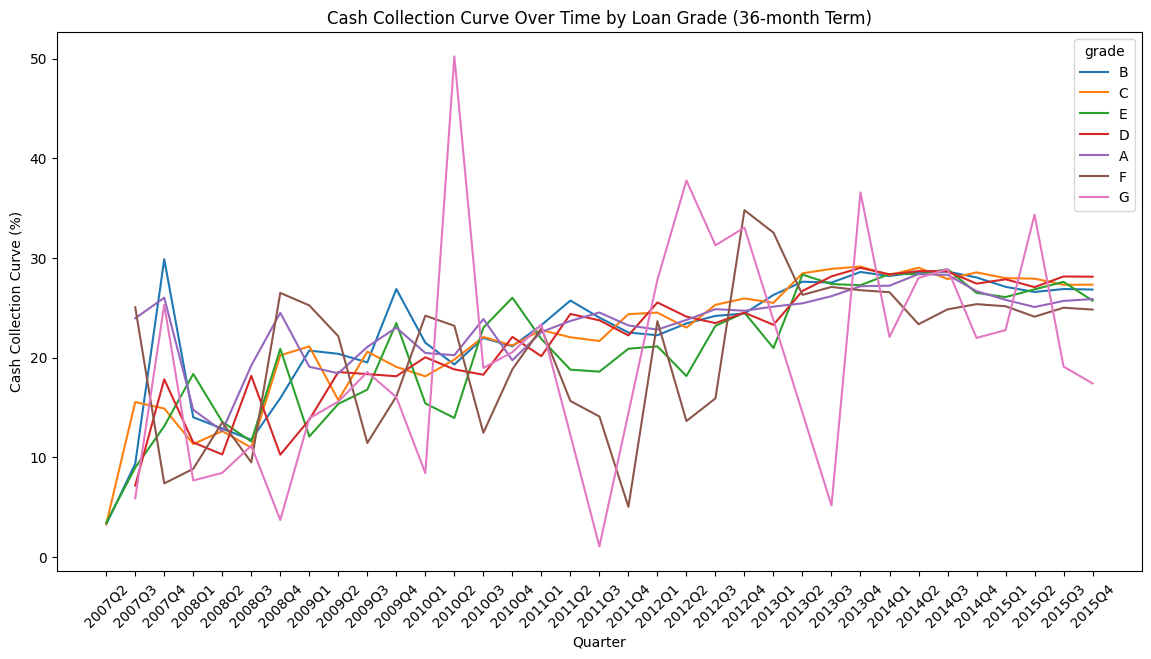

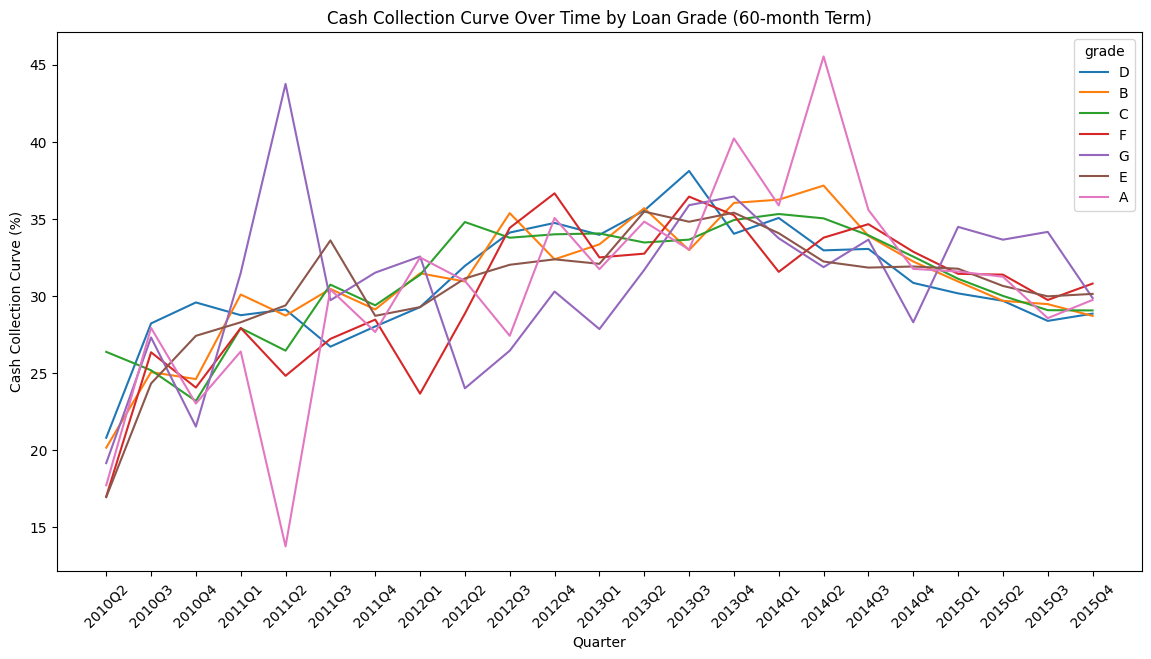

In [140]:
plot_cash_collection_curve(metrics_df)

In [141]:
def plot_annual_return(metrics):
    # Sort the DataFrame by 'quarter'
    metrics_sorted = metrics.sort_values(by='quarter')
    
    # Filter for 36-month term
    metrics_36 = metrics_sorted[metrics_sorted['term_months'] == 36]
    # Filter for 60-month term
    metrics_60 = metrics_sorted[metrics_sorted['term_months'] == 60]
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=metrics_36, x='quarter', y='annual_return', hue='grade', markers=True, dashes=False)
    plt.title('Annual Return Over Time by Loan Grade (36-month Term)')
    plt.xlabel('Quarter')
    plt.ylabel('Annual Return (%)')
    plt.xticks(rotation=45)  # Rotate the x-axis labels to be diagonal
    plt.show()
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=metrics_60, x='quarter', y='annual_return', hue='grade', markers=True, dashes=False)
    plt.title('Annual Return Over Time by Loan Grade (60-month Term)')
    plt.xlabel('Quarter')
    plt.ylabel('Annual Return (%)')
    plt.xticks(rotation=45)  # Rotate the x-axis labels to be diagonal
    plt.show()


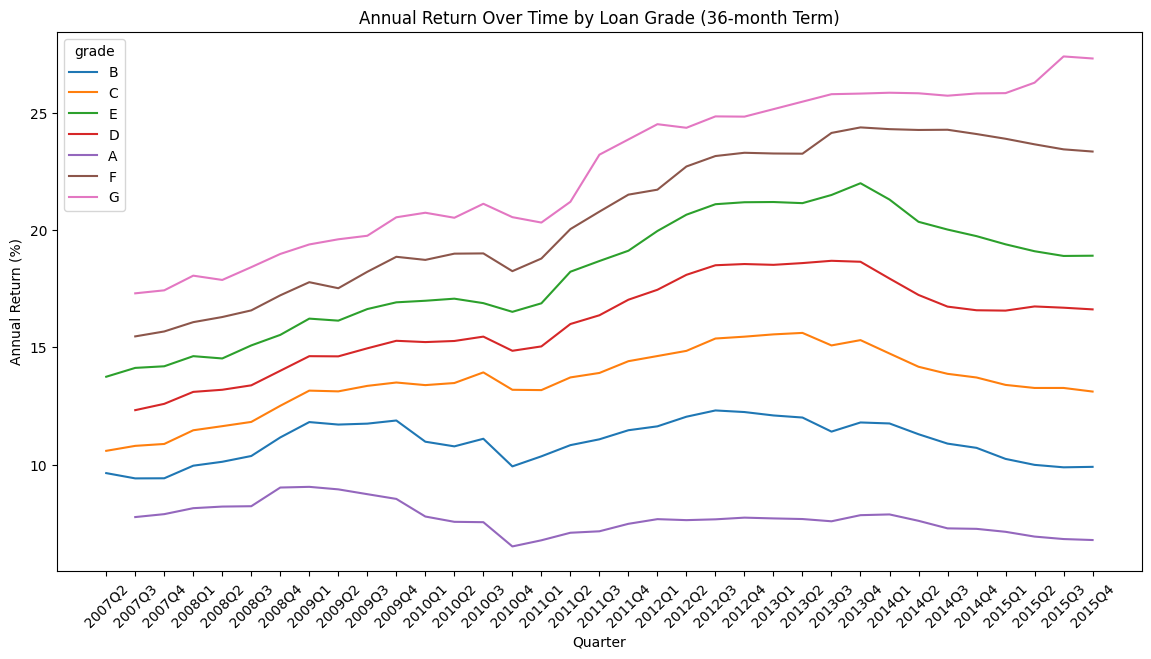

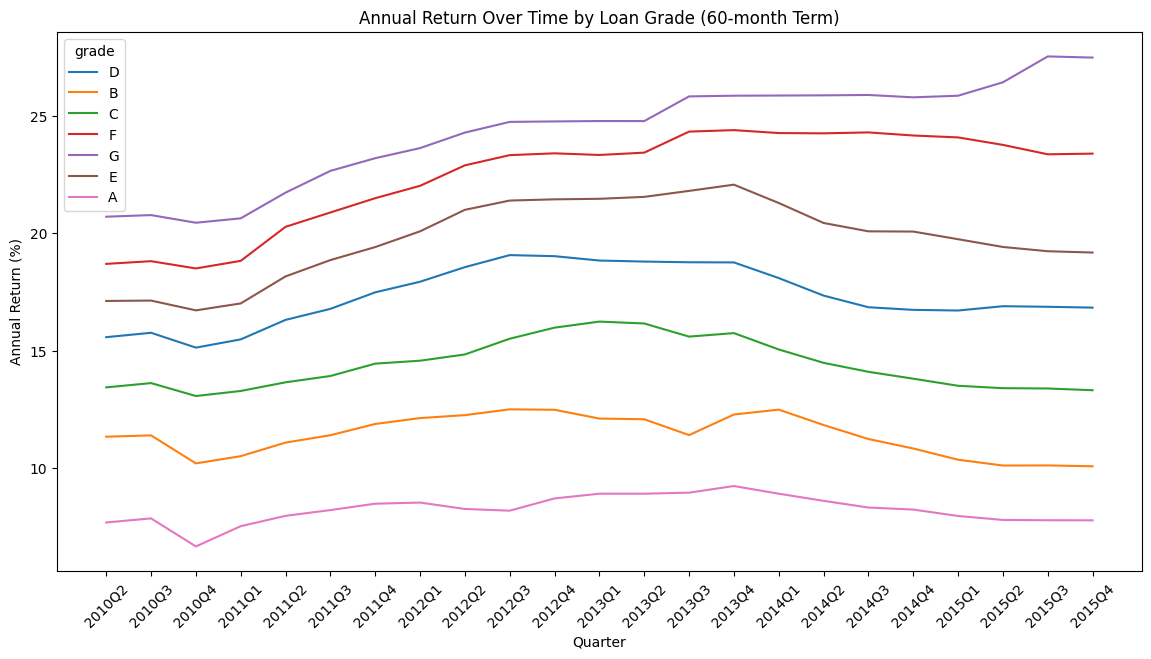

In [142]:
plot_annual_return(metrics_df)

In [143]:
df.dtypes

loan_amnt                  float64
funded_amnt                float64
term                        object
int_rate                   float64
grade                       object
sub_grade                   object
issue_d             datetime64[ns]
loan_status                 object
purpose                     object
annual_inc                 float64
dti                        float64
delinq_2yrs                float64
fico_range_low             float64
fico_range_high            float64
inq_last_6mths             float64
revol_bal                  float64
revol_util                 float64
total_acc                  float64
last_pymnt_d                object
last_pymnt_amnt            float64
application_type            object
pub_rec                    float64
dtype: object

In [144]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], errors='coerce')

# Define default statuses
default_statuses = ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)']
fully_paid = ["Fully Paid", "Does not meet the credit policy. Status:Fully Paid"]

# Define prepayment and default flags
df['prepaid'] = df['loan_status'].apply(lambda x: 1 if x in fully_paid else 0)
df['defaulted'] = df['loan_status'].apply(lambda x: 1 if x in default_statuses else 0)

# Example of creating a time-to-event column if you only have the last payment date
df['time_to_prepayment'] = (df['last_pymnt_d'] - df['issue_d']).dt.days
df['time_to_default'] = (df['last_pymnt_d'] - df['issue_d']).dt.days  # Ensure 'default_date' is available

# All customers DataFrame
all_customers_df = df.copy()

# Prepayment and Default DataFrames
prepayment_df = all_customers_df[all_customers_df['prepaid'] == 1].copy()
default_df = all_customers_df[all_customers_df['defaulted'] == 1].copy()

# Total number of customers
total_customers = len(all_customers_df)

# Calculate the percentage of customers for prepayment and default
prepayment_df['percentage'] = (prepayment_df['time_to_prepayment'].rank(pct=True) * 100)
default_df['percentage'] = (default_df['time_to_default'].rank(pct=True) * 100)

C:\Users\doron\AppData\Local\Temp\ipykernel_21908\330701651.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], errors='coerce')


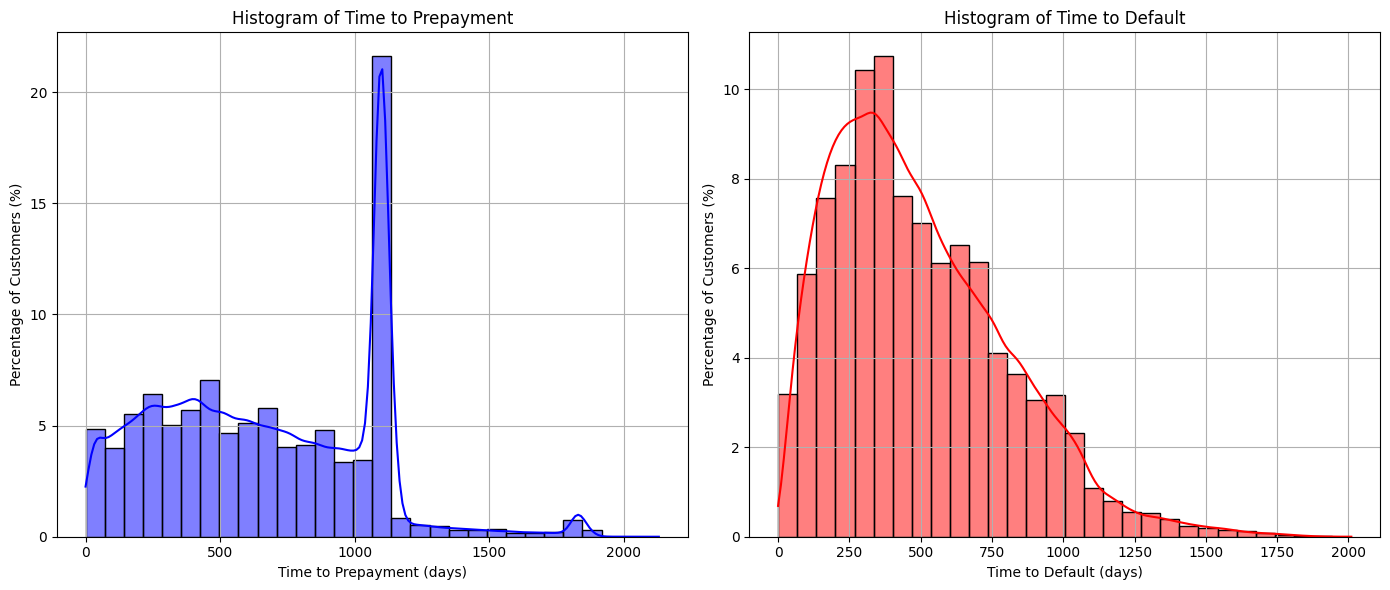

In [145]:
# Plot for Time to Prepayment
plt.figure(figsize=(14, 6))

# Plot histogram for Time to Prepayment
plt.subplot(1, 2, 1)
sns.histplot(prepayment_df['time_to_prepayment'], kde=True, stat='percent', bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Time to Prepayment')
plt.xlabel('Time to Prepayment (days)')
plt.ylabel('Percentage of Customers (%)')
plt.grid(True)

# Plot histogram for Time to Default
plt.subplot(1, 2, 2)
sns.histplot(default_df['time_to_default'], kde=True, stat='percent', bins=30, color='red', edgecolor='black')
plt.title('Histogram of Time to Default')
plt.xlabel('Time to Default (days)')
plt.ylabel('Percentage of Customers (%)')
plt.grid(True)

plt.tight_layout()
plt.show()



In [146]:
def fit_distributions(data):
    distributions = {
        'Normal': stats.norm,
        'Gamma': stats.gamma,
        'Log-Normal': stats.lognorm,
        'Log-Logistic': stats.fisk,
        'Beta': stats.beta,
        'Pareto': stats.pareto,
        'Poisson': stats.poisson,
        'Chi-Squared': stats.chi2,
    }
    
    results = {}
    
    for name, dist in distributions.items():
        if name == 'Poisson':
            # For Poisson distribution, estimate lambda as the mean
            mu = np.mean(data)
            params = (mu,)
            # Perform the KS test for Poisson
            D, p = stats.kstest(data, lambda x: stats.poisson.cdf(x, mu))
        else:
            # Fit the distribution and perform the test
            params = dist.fit(data)
            D, p = stats.kstest(data, dist.name, params)
        
        results[name] = (params, p)
    
    return results

In [147]:
def print_results(results):
    best_fit = max(results, key=lambda x: results[x][1])
    for dist_name, (params, p_value) in results.items():
        print(f"{dist_name} Distribution:")
        if dist_name == 'Poisson':
            print(f"  Parameter (lambda): {params[0]:.2f}")
        elif dist_name == 'Normal':
            print(f"  Parameter (mean): {params[0]:.2f}")
            print(f"  Parameter (std dev): {params[1]:.2f}")
        elif dist_name == 'Gamma':
            print(f"  Parameter (shape): {params[0]:.2f}")
            print(f"  Parameter (loc): {params[1]:.2f}")
            print(f"  Parameter (scale): {params[2]:.2f}")
        elif dist_name == 'Log-Normal':
            print(f"  Parameter (shape): {params[0]:.2f}")
            print(f"  Parameter (loc): {params[1]:.2f}")
            print(f"  Parameter (scale): {params[2]:.2f}")
        elif dist_name == 'Log-Logistic':
            print(f"  Parameter (shape): {params[0]:.2f}")
            print(f"  Parameter (loc): {params[1]:.2f}")
            print(f"  Parameter (scale): {params[2]:.2f}")
        elif dist_name == 'Beta':
            print(f"  Parameter (a): {params[0]:.2f}")
            print(f"  Parameter (b): {params[1]:.2f}")
            print(f"  Parameter (loc): {params[2]:.2f}")
            print(f"  Parameter (scale): {params[3]:.2f}")
        elif dist_name == 'Pareto':
            print(f"  Parameter (shape): {params[0]:.2f}")
            print(f"  Parameter (scale): {params[1]:.2f}")
        elif dist_name == 'Chi-Squared':
            print(f"  Parameter (df): {params[0]:.2f}")
        print(f"  KS Test p-value: {p_value:.4f}")
        print()

    print(f"The best-fitting distribution is: {best_fit} with a p-value of {results[best_fit][1]:.4f}")

In [148]:
def plot_fit(data, results):
    x = np.linspace(data.min(), data.max(), 100)
    
    plt.figure(figsize=(14, 6))
    
    # Plot fitted distributions
    for dist_name, (params, p_value) in results.items():
        dist = getattr(stats, dist_name.replace("-", "_").replace(" ", "_").lower(), None)
        if dist_name == 'Poisson':
            fitted_cdf = stats.poisson.cdf(np.arange(data.min(), data.max() + 1), params[0])
            plt.plot(np.arange(data.min(), data.max() + 1), fitted_cdf, label=f'{dist_name} (p-value={p_value:.2f})')
        elif dist:
            fitted_pdf = dist.pdf(x, *params)
            plt.plot(x, fitted_pdf, label=f'{dist_name} (p-value={p_value:.2f})')
    
    sns.histplot(data, kde=True, stat='density', bins=30, color='blue', edgecolor='black')
    plt.title('Histogram and Fitted Distributions')
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

c:\Users\doron\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:6480: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\doron\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\doron\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:6480: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\doron\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Time to Prepayment Distributions:
Normal Distribution:
  Parameter (mean): 673.40
  Parameter (std dev): 392.91
  KS Test p-value: 0.0000

Gamma Distribution:
  Parameter (shape): 8.25
  Parameter (loc): -489.33
  Parameter (scale): 140.97
  KS Test p-value: 0.0000

Log-Normal Distribution:
  Parameter (shape): 68.08
  Parameter (loc): -0.00
  Parameter (scale): 1.04
  KS Test p-value: 0.0000

Log-Logistic Distribution:
  Parameter (shape): 0.28
  Parameter (loc): -0.00
  Parameter (scale): 2.37
  KS Test p-value: 0.0000

Beta Distribution:
  Parameter (a): 1.64
  Parameter (b): 3.50
  Parameter (loc): -21.38
  Parameter (scale): 2151.63
  KS Test p-value: 0.0000

Pareto Distribution:
  Parameter (shape): 45921957.57
  Parameter (scale): -30923764531.20
  KS Test p-value: 0.0000

Poisson Distribution:
  Parameter (lambda): 673.40
  KS Test p-value: 0.0000

Chi-Squared Distribution:
  Parameter (df): 49.00
  KS Test p-value: 0.0000

The best-fitting distribution is: Normal with a p-valu

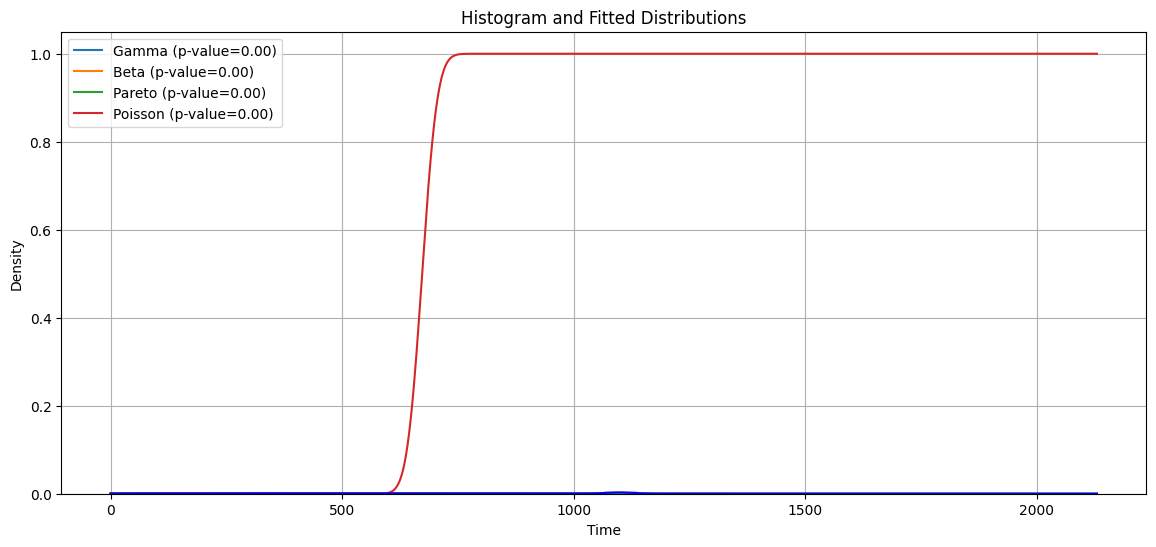

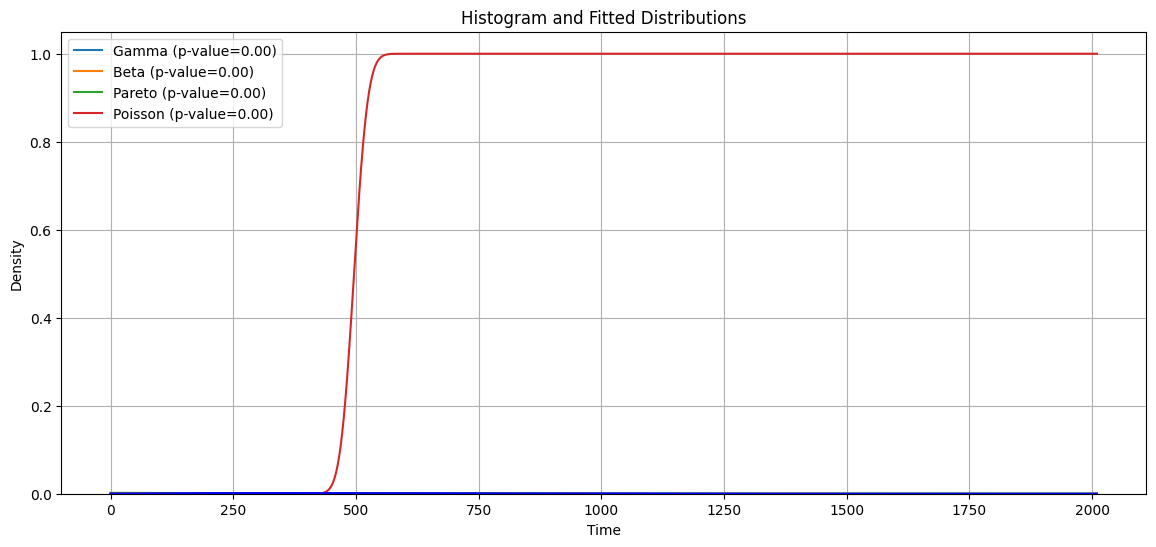

In [149]:
# Fit distributions to time to prepayment and time to default
prepayment_results = fit_distributions(prepayment_df['time_to_prepayment'])
default_results = fit_distributions(default_df['time_to_default'])

# Print results
print("Time to Prepayment Distributions:")
print_results(prepayment_results)

print("Time to Default Distributions:")
print_results(default_results)

# Plot the results
plot_fit(prepayment_df['time_to_prepayment'], prepayment_results)
plot_fit(default_df['time_to_default'], default_results)

Seems like the left grpah is of normal distribution and the right graph being beta

In [150]:
# Load the second database (assuming it is a CSV file)
second_df = pd.read_csv('lending_club_2016_2018.csv')

second_metrics = calculate_metrics(second_df)

C:\Users\doron\AppData\Local\Temp\ipykernel_21908\1095621799.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])


In [152]:
metrics_df.head

<bound method NDFrame.head of     grade  term_months quarter  loan_amount_sum  funded_amount_sum  \
0       A           36  2007Q3         161050.0           161050.0   
1       A           36  2007Q4         181500.0           181500.0   
2       A           36  2008Q1         694675.0           694675.0   
3       A           36  2008Q2         364150.0           320800.0   
4       A           36  2008Q3         227200.0           199625.0   
5       A           36  2008Q4         689050.0           679300.0   
6       A           36  2009Q1        1421350.0          1421350.0   
7       A           36  2009Q2        1888200.0          1888200.0   
8       A           36  2009Q3        2397325.0          2397200.0   
9       A           36  2009Q4        2993800.0          2993800.0   
10      A           36  2010Q1        3378850.0          3378850.0   
11      A           36  2010Q2        4236175.0          4137650.0   
12      A           36  2010Q3        5352725.0          535

In [151]:
second_metrics.head

<bound method NDFrame.head of     grade  term_months quarter  loan_amount_sum  funded_amount_sum  \
0       A           36  2016Q1      367288800.0        367288800.0   
1       A           36  2016Q2      266100950.0        266090950.0   
2       A           36  2016Q3      134765250.0        134765250.0   
3       A           36  2016Q4      164046925.0        164046925.0   
4       A           36  2017Q1      201450200.0        201450200.0   
5       A           36  2017Q2      231303475.0        231303475.0   
6       A           36  2017Q3      266926475.0        266926475.0   
7       A           36  2017Q4      339525025.0        339525025.0   
8       A           36  2018Q1      380849300.0        380849300.0   
9       A           36  2018Q2      454670775.0        454670775.0   
10      A           36  2018Q3      505532600.0        505532600.0   
11      A           36  2018Q4      491914500.0        491914500.0   
12      A           60  2016Q1       35860625.0         3586

In [162]:
# Define the function to calculate percentage changes
def calculate_percentage_changes(df):
    """Calculate percentage change between consecutive quarters for each metric."""
    # Sort by quarter to ensure proper chronological order
    df = df.sort_values(by='quarter')
    
    # Calculate percentage changes for columns except 'grade', 'term_months', and 'quarter'
    metric_columns = [col for col in df.columns if col not in ['grade', 'term_months', 'quarter']]
    
    percentage_changes = df.copy()
    
    for col in metric_columns:
        percentage_changes[col] = df[col].pct_change() * 100
    
    # Drop the first row which will have NaN changes due to pct_change
    percentage_changes = percentage_changes.dropna().reset_index(drop=True)
    
    return percentage_changes

# Filter data from 2009-Q4 to 2015-Q4
start_date = '2010Q1'  # Corresponding to 2009-Q4
end_date = '2015Q4'    # Corresponding to 2015-Q4

# Filter the DataFrame for the relevant date range
filtered_metrics_df = metrics_df[(metrics_df['quarter'] >= start_date) & (metrics_df['quarter'] <= end_date)]

# Apply percentage change calculation
percentage_changes_df = calculate_percentage_changes(filtered_metrics_df)

# Display the result
print(percentage_changes_df)


    grade  term_months quarter  loan_amount_sum  funded_amount_sum  \
0       C           36  2009Q4        55.700949          55.700949   
1       D           36  2009Q4       -19.028720         -19.028720   
2       F           36  2009Q4       -87.423746         -87.423746   
3       E           36  2009Q4       138.515827         138.515827   
4       B           36  2009Q4       499.213902         499.213902   
5       G           36  2009Q4       -95.484327         -95.484327   
6       F           36  2010Q1        86.763506          86.763506   
7       G           36  2010Q1       -52.031810         -52.031810   
8       A           36  2010Q1      1131.134997        1131.134997   
9       E           36  2010Q1       -58.038238         -58.038238   
10      B           36  2010Q1       474.277503         474.064148   
11      C           36  2010Q1       -31.101047         -31.075440   
12      D           36  2010Q1       -28.269986         -28.269986   
13      B           